In [2]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Single-cell RNA-Seq (scRNA-Seq) data is well known for its high level of noise and sparsity.
Due to the challenges in amplifying the very low amounts of RNA present in individual cells, only
a small portion of the transcribed RNAs is captured during sequencing. This results in situations
where many genes may be active at once, and two scRNA-Seq measurements might originate
from cells with identical expression profiles despite appearing different.
In this assignment, you will implement and analyze autoencoders to extract meaningful clusters
from scRNA-Seq count data. These clusters could reflect diverse expression states within the
same tissue, such as differences arising from various cell cycle phases or distinct cell types.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Q1: Autoencoder Training for Dimensionality Reduction [1 pts] <br>
● Load the counts and labels. <br>
● Train a fully connected autoencoder to learn a low-dimensional representation of the gene expression data. <br>
● Use two different latent space sizes: 10 and 50 (i.e., build two separate models). <br>
● Use Mean Squared Error (MSE) as the loss function. <br>
● Train the model for approximately 50 epochs (adjust as needed for optimal results). <br>
● Report the training and testing history plots. <br>
Hints: <br>
● Use a symmetric encoder-decoder architecture (e.g., 1000 -> 100 -> 10 for
encoding and 10 -> 100 -> 1000 for decoding). <br>
● Do not use activation functions in the input, latent, or output layers. <br>
● Normalization of input data is not required. <br>

In [ ]:
counts = np.load('/content/drive/My Drive/QBIO465/counts.npy')
labels = np.loadtxt('/content/drive/My Drive/QBIO465/labels.txt', dtype=int)

# splitting into train/test (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(counts, labels, test_size=0.2, random_state=42)

def autoencoder(latent_dim):
    inputs = keras.Input(shape=(1000,))
    x = layers.Dense(100, activation='relu')(inputs)
    latent = layers.Dense(latent_dim)(x)  # no activation

    # decoding
    x = layers.Dense(100, activation='relu')(latent)
    outputs = layers.Dense(1000)(x)  # no activation
    autoencoder = keras.Model(inputs, outputs)
    return autoencoder

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 11.4302 - val_loss: 2.8742
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.7757 - val_loss: 2.6478
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6523 - val_loss: 2.6353
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6367 - val_loss: 2.6286
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6330 - val_loss: 2.6234
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6271 - val_loss: 2.6179
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6229 - val_loss: 2.6162
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6249 - val_loss: 2.6135
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6151 - val_loss: 2.6092
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6204 - val_loss: 2.6063
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6034 - val_loss: 2.6027
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.

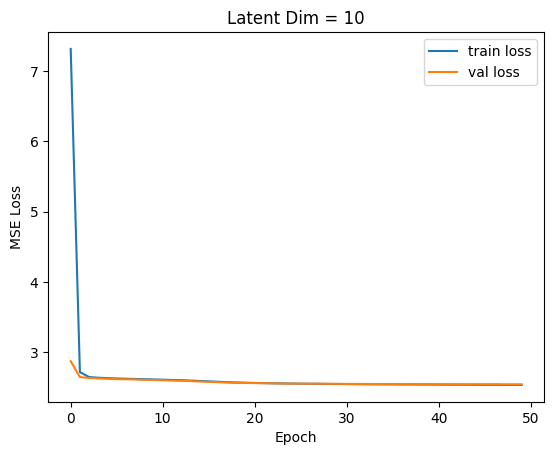

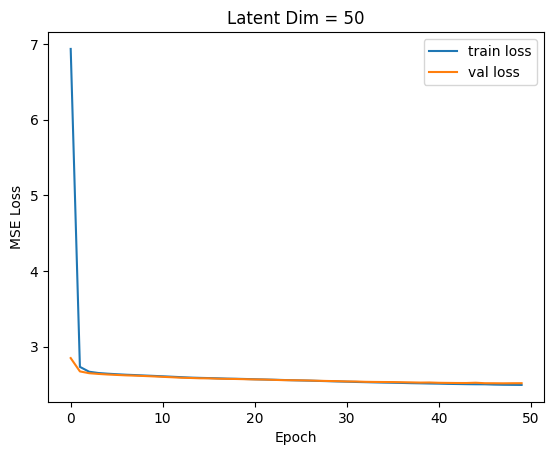

In [ ]:
# training
# latent space = 10
autoencoder_10 = autoencoder(latent_dim=10)
autoencoder_10.compile(optimizer='adam', loss='mse')
history_10 = autoencoder_10.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# latent space = 50
autoencoder_50 = autoencoder(latent_dim=50)
autoencoder_50.compile(optimizer='adam', loss='mse')
history_50 = autoencoder_50.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# plotting
def plot_history(history, title):
    plt.figure()
    plt.plot(history.history['loss'], label='train loss')
    plt.plot(history.history['val_loss'], label='val loss')
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('MSE Loss')
    plt.legend()
    plt.show()

plot_history(history_10, 'Latent Dim = 10')
plot_history(history_50, 'Latent Dim = 50')

#Q2: Reconstruction Error Analysis [1 pts] <br>
● Compare the training and testing history plots for the models with latent space sizes of 10 and 50. <br>
● Report the MSE between the reconstructed data and the original data for each latent space size. <br>

In [ ]:
reconstructed_10 = autoencoder_10.predict(X_test)
mse_10 = np.mean(np.square(X_test - reconstructed_10))
print(f'MSE for latent dim 10: {mse_10}')

reconstructed_50 = autoencoder_50.predict(X_test)
mse_50 = np.mean(np.square(X_test - reconstructed_50))
print(f'MSE for latent dim 50: {mse_50}')

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE for latent dim 10: 2.5438904762268066
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
MSE for latent dim 50: 2.5185980796813965


#Discuss: <br>
● Discuss the differences in convergence speed between the two models. <br>
● Explain how the latent space size (10 vs. 50) affects the reconstruction
error, and in particular, why one model might achieve a lower final MSE despite converging more slowly. <br>
Answer: Both the latent dimensions 10 and 50 models had fast convergence, with the 50 model being slightly slower because it had more parameters to optimize in the larger space. The model with a latent size 50 had a lower MSE than the latent size 10 model bceause the larger latent space can capture more complex structure and variance from the original data.

#Q3: Visualization of Reconstructions [2 pts] <br>
● Using the autoencoder with a latent space size of 10, create the following visualizations: <br>
○ Generate PCA plots comparing the original data to the reconstructed data. <br>
○ Generate t-SNE plots comparing the original data to the reconstructed data. <br>
● Use labels.txt as labels when plotting. <br>
● Compare the PCA and t-SNE visualizations between the original and reconstructed data. <br>

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


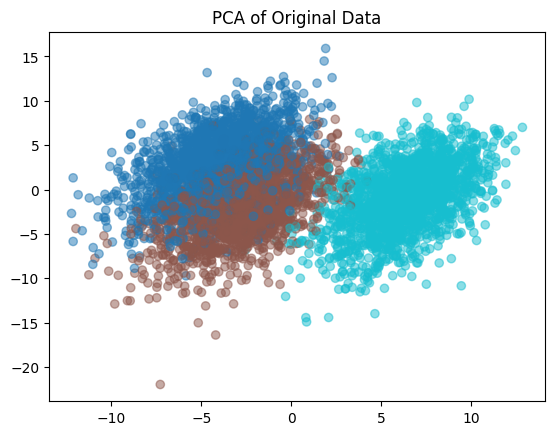

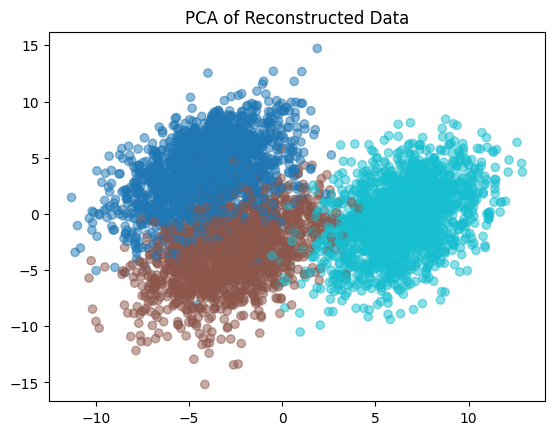

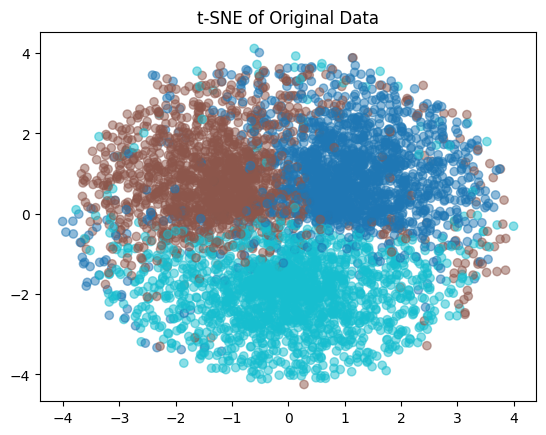

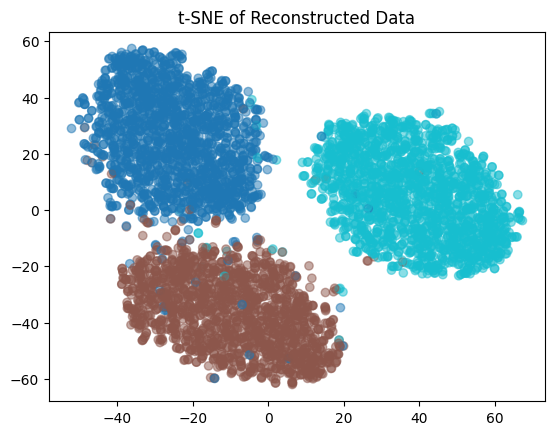

In [ ]:
# Use latent=10 model for this
reconstructed = autoencoder_10.predict(counts)

# PCA
pca = PCA(n_components=2)
pca_orig = pca.fit_transform(counts)
pca_recon = pca.fit_transform(reconstructed)

plt.figure()
plt.scatter(pca_orig[:,0], pca_orig[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('PCA of Original Data')
plt.show()

plt.figure()
plt.scatter(pca_recon[:,0], pca_recon[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('PCA of Reconstructed Data')
plt.show()

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_orig = tsne.fit_transform(counts)
tsne_recon = tsne.fit_transform(reconstructed)

plt.figure()
plt.scatter(tsne_orig[:,0], tsne_orig[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('t-SNE of Original Data')
plt.show()

plt.figure()
plt.scatter(tsne_recon[:,0], tsne_recon[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('t-SNE of Reconstructed Data')
plt.show()

#Discuss: <br>
● Discuss any observable differences in clustering between the original and reconstructed data for PCA and t-SNE. <br>
● Explain possible reasons for these differences based on the autoencoder's
reconstruction process. <br>
Answer: In both the PCA and t-SNE the reconstructed data preserved the major cluster structures seen in the original data, the separation between clusters became less distinct. In the reconstructed data, there was a slight amount of blending between nearby clusters. The slight loss of separation is expected because the encoder compresses the data into a smaller latent space then reconstructs.

#Q4: Latent Space Visualization with 2-Dimensional Latent Space [1 pts] <br>
● Retrain the autoencoder with a latent space of 2 dimensions. <br>
● Extract the 2-dimensional latent representations. <br>
● Create a 2D scatter plot of the latent space, using labels.txt to color-code the clusters. <br>

Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 12.1308 - val_loss: 2.9119
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.7737 - val_loss: 2.6282
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 2.6429 - val_loss: 2.6172
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 2.6332 - val_loss: 2.6157
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 2.6288 - val_loss: 2.6152
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.6372 - val_loss: 2.6150
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.6321 - val_loss: 2.6143
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6251 - val_loss: 2.6140
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 2.6238 - val_loss: 2.6137
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.6146 - val_loss: 2.6128
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.6214 - val_loss: 2.6129
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 2.

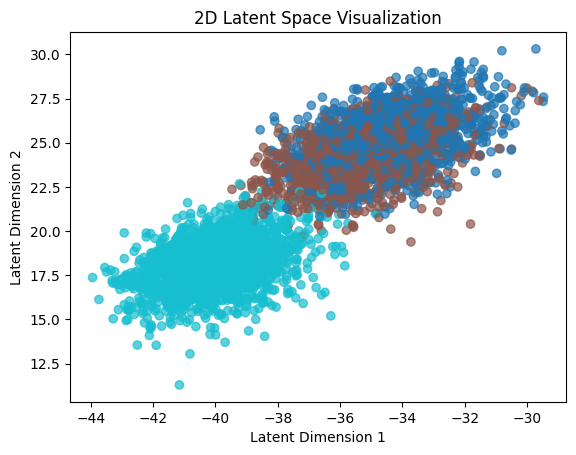

In [ ]:
autoencoder_2d = autoencoder(latent_dim=2)
autoencoder_2d.compile(optimizer='adam', loss='mse')
autoencoder_2d.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# extracting 2D latent representations
encoder_2d = keras.Model(autoencoder_2d.input, autoencoder_2d.layers[2].output)
latent_2d = encoder_2d.predict(counts)

plt.figure()
plt.scatter(latent_2d[:,0], latent_2d[:,1], c=labels, cmap='tab10', alpha=0.7)
plt.title('2D Latent Space Visualization')
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')
plt.show()

#Discuss: <br>
● Discuss the observed clustering in the 2D latent space, including how well the clusters are separated and what the results suggest about the autoencoder’s ability to capture the underlying structure of the data. <br>
Answer: The 2D latent space scatter plot showed three clearly separated clusters that correspond to the original labels. This suggests that the underlying variation between three cell groups can be represented in a low-dimensional space.

#Q5: Alternative Loss Function Experiment [2 pts] <br>
The new loss function, nonzero_mse_loss, computes the MSE only over the nonzero
elements of the input data. This is particularly useful for sparse datasets (like scRNA-seq) where zeros are prevalent and may not carry meaningful signals. By ignoring zeros, the loss focuses on capturing errors where there is actual gene expression data, potentially leading to improved learning of meaningful features. <br>
● Replace the MSE loss with the following custom loss function when training the
autoencoder (using a latent space size of 10): <br>
import tensorflow as tf <br>
def nonzero_mse_loss(y_true, y_pred): <br>
## Create a mask for non-zero elements <br>
mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32) <br>
nonzero_count = tf.reduce_sum(mask) # Count the number of non-zero elements <br>
# Calculate the squared difference for non-zero elements <br>
nonzero_squared_diff = tf.square(y_true - y_pred * mask) <br>
## Compute the mean of the non-zero squared differences <br>
nonzero_mse = tf.reduce_sum(nonzero_squared_diff) / nonzero_count <br>
return nonzero_mse <br>
● After training with this alternative loss, do the following: <br>
● Compare the reconstruction MSE from this experiment with the MSE reported in Q2. <br>
● Generate the following four plots: <br>
○ PCA plot: Reconstructed data vs. Original data. <br>
○ PCA plot: Latent embeddings vs. Original data. <br>
○ t-SNE plot: Reconstructed data vs. Original data. <br>
○ t-SNE plot: Latent embeddings vs. Original data. <br>

In [ ]:
def nonzero_mse_loss(y_true, y_pred):
    mask = tf.cast(tf.math.not_equal(y_true, 0), tf.float32)
    nonzero_count = tf.reduce_sum(mask)
    nonzero_squared_diff = tf.square((y_true - y_pred) * mask)
    nonzero_mse = tf.reduce_sum(nonzero_squared_diff) / nonzero_count
    return nonzero_mse

# training
autoencoder_nonzero = autoencoder(latent_dim=10)
autoencoder_nonzero.compile(optimizer='adam', loss=nonzero_mse_loss)
autoencoder_nonzero.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# Predictions
reconstructed_nonzero = autoencoder_nonzero.predict(counts)
encoder_nonzero = keras.Model(autoencoder_nonzero.input, autoencoder_nonzero.layers[2].output)
latent_nonzero = encoder_nonzero.predict(counts)


Epoch 1/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 17.7711 - val_loss: 0.6769
Epoch 2/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5377 - val_loss: 0.3870
Epoch 3/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3783 - val_loss: 0.3597
Epoch 4/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3543 - val_loss: 0.3516
Epoch 5/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.3437 - val_loss: 0.3487
Epoch 6/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.3383 - val_loss: 0.3410
Epoch 7/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3355 - val_loss: 0.3373
Epoch 8/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3315 - val_loss: 0.3338
Epoch 9/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3280 - val_loss: 0.3316
Epoch 10/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3246 - val_loss: 0.3324
Epoch 11/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3269 - val_loss: 0.3327
Epoch 12/50
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.

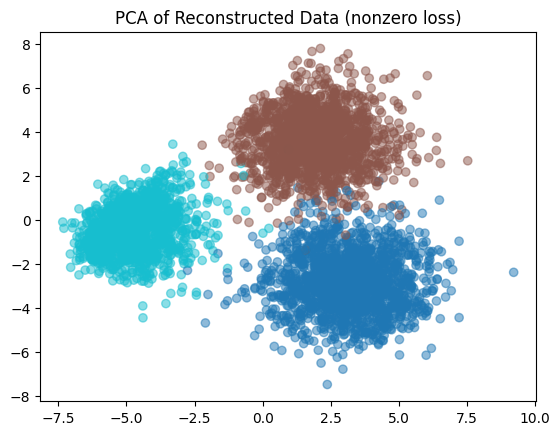

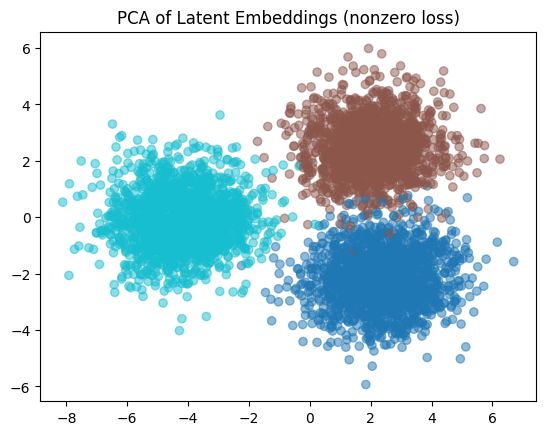

In [ ]:
# PCA plots
pca_orig = pca.fit_transform(counts)
pca_recon_nonzero = pca.fit_transform(reconstructed_nonzero)
pca_latent_nonzero = pca.fit_transform(latent_nonzero)

plt.figure()
plt.scatter(pca_recon_nonzero[:,0], pca_recon_nonzero[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('PCA of Reconstructed Data (nonzero loss)')
plt.show()

plt.figure()
plt.scatter(pca_latent_nonzero[:,0], pca_latent_nonzero[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('PCA of Latent Embeddings (nonzero loss)')
plt.show()

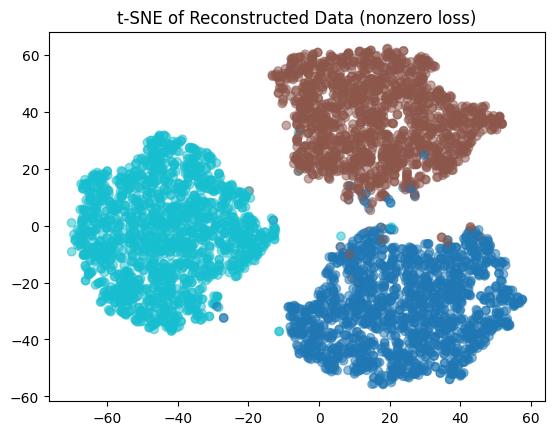

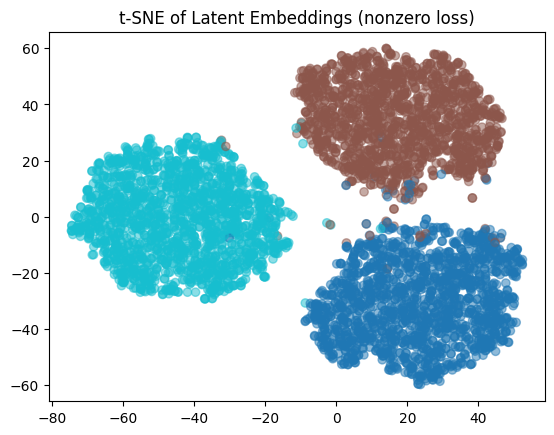

In [ ]:
# t-SNE plots
tsne_recon_nonzero = tsne.fit_transform(reconstructed_nonzero)
tsne_latent_nonzero = tsne.fit_transform(latent_nonzero)

plt.figure()
plt.scatter(tsne_recon_nonzero[:,0], tsne_recon_nonzero[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('t-SNE of Reconstructed Data (nonzero loss)')
plt.show()

plt.figure()
plt.scatter(tsne_latent_nonzero[:,0], tsne_latent_nonzero[:,1], c=labels, cmap='tab10', alpha=0.5)
plt.title('t-SNE of Latent Embeddings (nonzero loss)')
plt.show()

##Discuss: <br>
● Discuss any observed differences, noting if the model with the new loss better captures the relevant structure in the data by focusing on nonzero values. <br>

Answer: When using the nonzero MSE loss the reconstructed data and latent embeddings showed tighter distinct clusters in PCA and the t-SNE plots compared to the original MSE model. This is because the nonzero MSE loss focuses learning only nonzero genes rather than treating zeroes as important. This better helps capture the meaningful differences in gene expression while avoiding noise distraction.

In [4]:
!pip install
!jupyter nbconvert --to html "/content/drive/MyDrive/QBIO465/SEB QBIO465 HW7.ipynb"

ERROR: You must give at least one requirement to install (see "pip help install")
[NbConvertApp] Converting notebook /content/drive/MyDrive/QBIO465/SEB QBIO465 HW7.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 11 image(s).
[NbConvertApp] Writing 2261038 bytes to /content/drive/MyDrive/QBIO465/SEB QBIO465 HW7.html
